In [1]:
%load_ext autoreload
%autoreload 2

# %cd '/workspaces/polarization_reddit'
%cd '/home/xavi_oliva/Documents/Github/polarization_reddit'

/home/xavi_oliva/Documents/Github/polarization_reddit


In [2]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

from eda.constants import FIGURES_DIR, FIG_SIZE
from polarization.utils import calculate_polarization, calculate_polarization_by_time
from preprocessing.utils import load_event_comments, load_event_vocab
from preprocessing.constants import OUTPUT_DIR, EVENTS_INFO

sns.set(rc={"figure.figsize": FIG_SIZE})


In [3]:
EVENT_KEY = "us_elections_2016"
EVENT_DETAILS = EVENTS_INFO[EVENT_KEY]

print(EVENT_DETAILS)

{'name': '2016 US presidential election', 'date': Timestamp('2016-11-08 00:00:00')}


In [4]:
print(EVENT_DETAILS["name"])

event_comments = load_event_comments(EVENT_KEY)
event_vocab = load_event_vocab(EVENT_KEY)

2016 US presidential election


In [22]:
event_polarization = calculate_polarization(
    event_comments,
    event_vocab,
)

print(event_polarization[0])

with open(f"{OUTPUT_DIR}/{EVENT_KEY}_leaveout_polarization.json", "w") as file:
    json.dump(event_polarization, file)

Calculate leave-out polarization of users


Republican polarization: 100%|██████████| 3930/3930 [02:38<00:00, 24.87it/s]


Calculate leave-out polarization with random assignment of users


Democrat polarization:   0%|          | 0/3930 [00:00<?, ?it/s]/home/xavi_oliva/Documents/Github/polarization_reddit/polarization/utils.py:38: UserWarning: A lot of values in the denominator are zero: 446
  warnings.warn(
Democrat polarization:   1%|          | 45/3930 [00:01<02:08, 30.25it/s]/home/xavi_oliva/Documents/Github/polarization_reddit/polarization/utils.py:38: UserWarning: A lot of values in the denominator are zero: 447
  warnings.warn(
Democrat polarization:   6%|▌         | 235/3930 [00:07<02:05, 29.35it/s]/home/xavi_oliva/Documents/Github/polarization_reddit/polarization/utils.py:38: UserWarning: A lot of values in the denominator are zero: 448
  warnings.warn(
Democrat polarization:   7%|▋         | 282/3930 [00:09<02:02, 29.83it/s]/home/xavi_oliva/Documents/Github/polarization_reddit/polarization/utils.py:38: UserWarning: A lot of values in the denominator are zero: 452
  warnings.warn(
Democrat polarization:  19%|█▉        | 745/3930 [00:25<01:55, 27.57it/s]/home/xavi

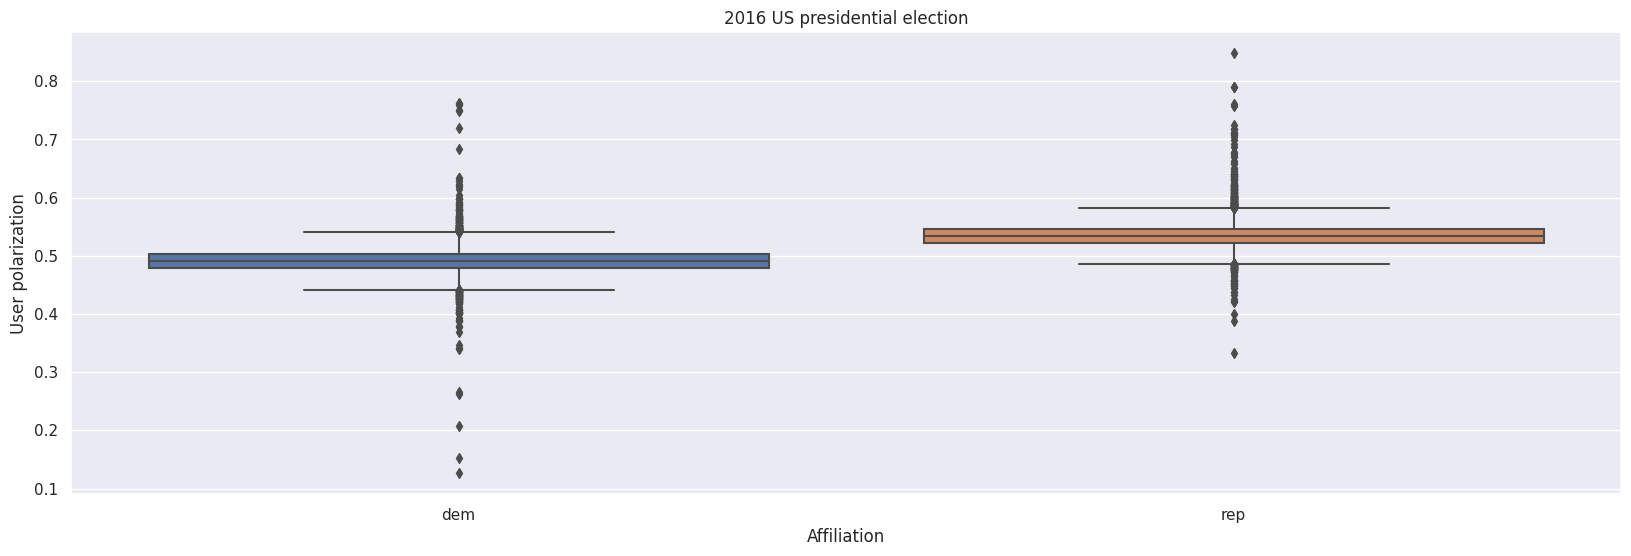

In [23]:
# Plot user polarization
_, (dem_polarization, rep_polarization) = event_polarization

user_pols = pd.DataFrame(
    zip(
        dem_polarization + rep_polarization,
        ["dem"] * len(dem_polarization) + ["rep"] * len(dem_polarization),
    ),
    columns=["polarization", "affiliation"],
)

ax = sns.boxplot(y="polarization", x="affiliation", data=user_pols)

ax.set_xlabel("Affiliation")
ax.set_ylabel("User polarization")
ax.set_title(EVENT_DETAILS["name"])

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_user_polarization.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)

plt.show()


In [33]:
event_comments["datetime"] = pd.to_datetime(event_comments["created_utc"], unit='s')

In [43]:
pol_by_week_events = calculate_polarization_by_time(
    event_comments,
    event_vocab,
    freq="W",
)

pol_by_week_events.to_csv(f"{OUTPUT_DIR}/{EVENT_KEY}_polarization_by_week.csv")


2016-01-03 00:00:00
Calculate leave-out polarization of users


Republican polarization: 100%|██████████| 787/787 [00:05<00:00, 148.39it/s]


Calculate leave-out polarization with random assignment of users


Republican polarization: 100%|██████████| 787/787 [00:05<00:00, 140.53it/s]


0.5103818110822874
2016-01-10 00:00:00
Calculate leave-out polarization of users


Republican polarization: 100%|██████████| 1564/1564 [00:20<00:00, 78.17it/s]


Calculate leave-out polarization with random assignment of users


Republican polarization: 100%|██████████| 1564/1564 [00:18<00:00, 83.04it/s]


0.5105255847019001
2016-01-17 00:00:00
Calculate leave-out polarization of users


Republican polarization: 100%|██████████| 1816/1816 [00:27<00:00, 66.21it/s]


Calculate leave-out polarization with random assignment of users


Republican polarization: 100%|██████████| 1816/1816 [00:24<00:00, 75.52it/s]


0.5143674205552196
2016-01-24 00:00:00
Calculate leave-out polarization of users


Republican polarization: 100%|██████████| 2051/2051 [00:33<00:00, 60.53it/s]


Calculate leave-out polarization with random assignment of users


Republican polarization: 100%|██████████| 2051/2051 [00:30<00:00, 66.36it/s]


0.5147084293688933
2016-01-31 00:00:00
Calculate leave-out polarization of users


Republican polarization: 100%|██████████| 2588/2588 [00:49<00:00, 52.11it/s]


Calculate leave-out polarization with random assignment of users


Republican polarization: 100%|██████████| 2588/2588 [00:45<00:00, 56.97it/s]


0.515778504812761


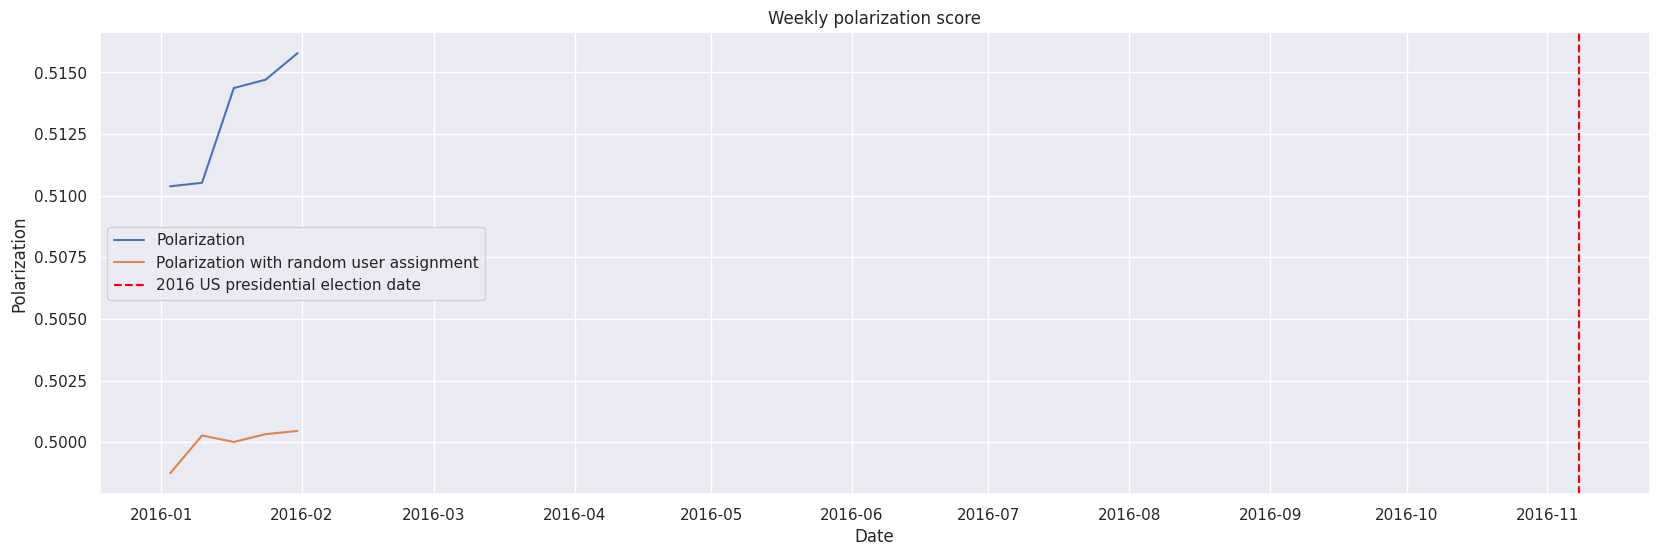

In [44]:
# Plot weekly

ax = sns.lineplot(
    x=pol_by_week_events["date"],
    y=pol_by_week_events["polarization"],
    label="Polarization",
)
sns.lineplot(
    data=pol_by_week_events,
    x="date",
    y="random_polarization",
    label="Polarization with random user assignment",
)

plt.axvline(
    EVENTS_INFO[EVENT_KEY]["date"],
    linestyle="--",
    color="red",
    label=f"{EVENTS_INFO[EVENT_KEY]['name']} date",
)

plt.xlabel("Date")
plt.ylabel("Polarization")
plt.title("Weekly polarization score")
plt.legend()

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_polarization_by_week.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)
plt.show()


In [ ]:
pol_by_day_events = calculate_polarization_by_time(
    event_comments,
    event_vocab,
    freq="D",
)
pol_by_day_events.to_csv(f"{OUTPUT_DIR}/{EVENT_KEY}_polarization_by_day.csv")


In [ ]:
# Plot daily

ax = sns.lineplot(
    x=pol_by_day_events["date"],
    y=pol_by_day_events["polarization"],
    label="Polarization",
)
sns.lineplot(
    data=pol_by_day_events,
    x="date",
    y="random_polarization",
    label="Polarization with random user assignment",
)

plt.axvline(
    EVENTS_INFO[EVENT_KEY]["date"],
    linestyle="--",
    color="red",
    label=f"{EVENTS_INFO[EVENT_KEY]['name']} date",
)

plt.xlabel("Date")
plt.ylabel("Polarization")
plt.title("Daily polarization score")
plt.legend()

plt.savefig(
    fname=f"{FIGURES_DIR}/{EVENT_KEY}_polarization_by_day.pdf",
    bbox_inches="tight",
    pad_inches=0,
    format="pdf",
)
plt.show()
